In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import model_selection, linear_model, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

%matplotlib inline

In [37]:
"""first kaggle submission for titanic competition."""

__author__ = "Josh Engroff"
__license__ = "MIT"
__maintainer__ = "Josh Engroff"
__email__ = "josh.engroff@gmail.com"

In [2]:
train = pd.read_csv('titanic2/train.csv')
test = pd.read_csv('titanic2/test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
# split Data
X = train[['Sex','Age', 'Pclass']]
y = train.Survived

In [12]:
# clean X data
X.isna().sum()
X = pd.get_dummies(X)
X.head()
X.fillna(train.Age.mean(), inplace=True)

In [13]:
X.head()

,Age,Pclass,Sex_female,Sex_male
0,22.0,3,0,1
1,38.0,1,1,0
2,26.0,3,1,0
3,35.0,1,1,0
4,35.0,3,0,1


In [19]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [20]:
# train data 
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [28]:
dt.predict(X_test)

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0])

In [21]:
# accuracy score
predictions = dt.predict(X_test)
accuracy_score(predictions, y_test)

0.8435754189944135

In [22]:
# format kaggle test data
to_predict_test = test[['Age','Sex', 'Pclass']]
to_predict_test = pd.get_dummies(to_predict_test)
to_predict_test.isnull().sum()
to_predict_test.fillna(to_predict_test.Age.mean(), inplace=True)

In [23]:
# format for submission
predictions = dt.predict(to_predict_test)
passenger_id = test.PassengerId
to_dict = {'PassengerId': passenger_id,
          'Survived': predictions}
submission = pd.DataFrame(to_dict)
submission.to_csv('titanic_submission.csv', index=False)

### received kaggle score ###

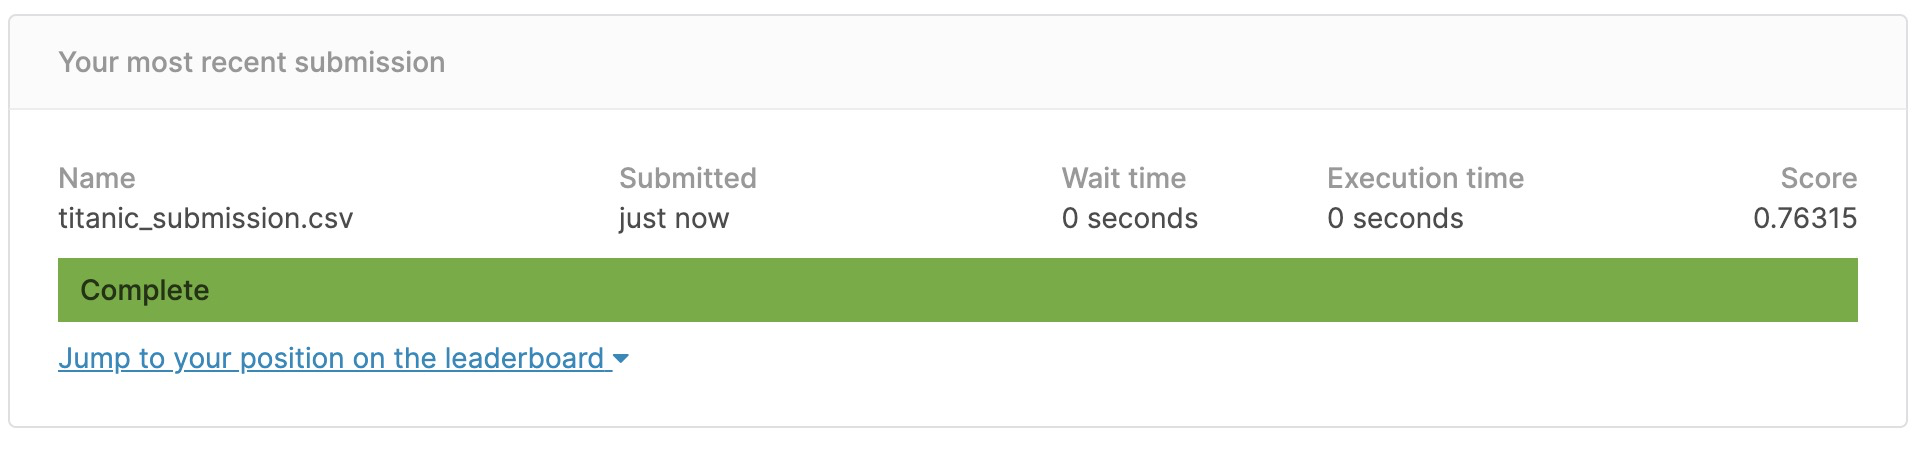

### according to Kaggle this puts me in top 80% ###

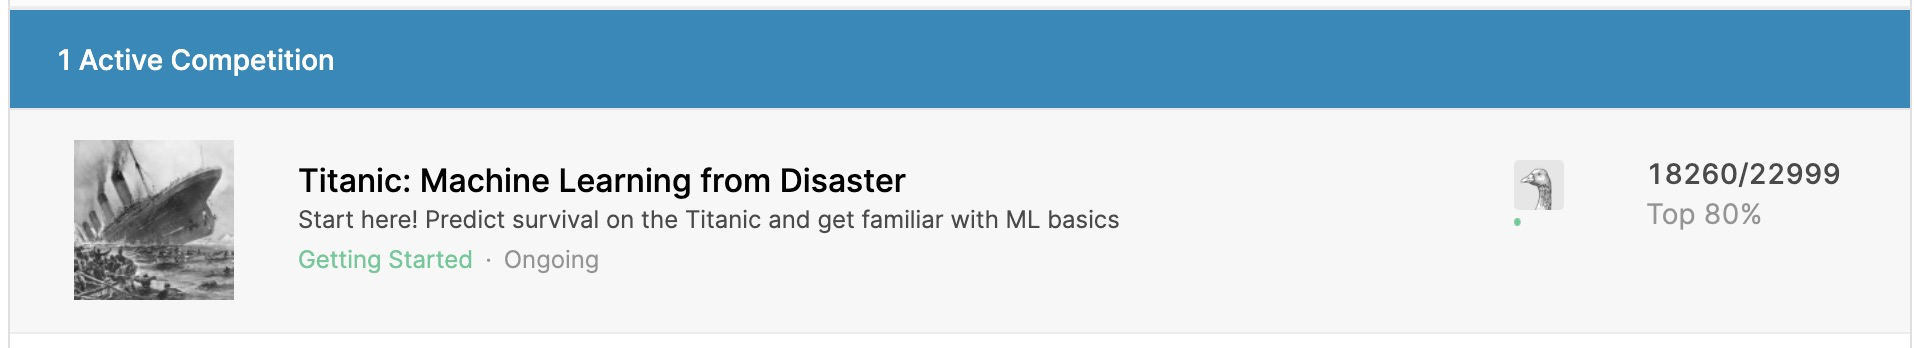